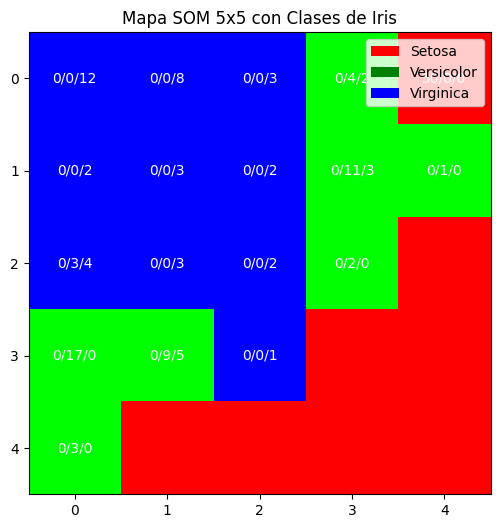

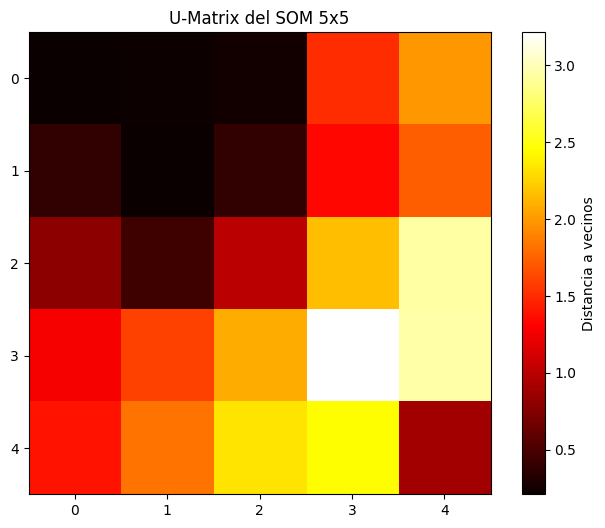

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Cargar datos
data = np.loadtxt('iris1.txt', delimiter=',')

# Crear etiquetas (0=setosa, 1=versicolor, 2=virginica)
labels = np.array([0]*50 + [1]*50 + [2]*50)


# Inicializar pesos (4 características × 5×5 neuronas)
w = np.random.rand(4, 5, 5)

# Función para encontrar BMU
def find_bmu(x, w):
    distances = np.sum((w - x.reshape(4,1,1))**2, axis=0)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Entrenamiento rápido (1 época para ejemplo)
for epoch in range(1):
    for i, x in enumerate(data):
        bmu = find_bmu(x, w)
        # Actualizar pesos (versión simplificada)
        lr = 0.1
        radius = 2
        for i in range(5):
            for j in range(5):
                dist_to_bmu = (i-bmu[0])**2 + (j-bmu[1])**2
                if dist_to_bmu <= radius**2:
                    influence = lr * np.exp(-dist_to_bmu / (2*radius**2))
                    w[:,i,j] += influence * (x - w[:,i,j])


# Crear matriz para almacenar la clase dominante en cada neurona
class_map = np.zeros((5,5,3))  # Para 3 clases (RGB)

# Contar cuántos puntos de cada clase caen en cada neurona
counts = np.zeros((5,5,3))

for x, label in zip(data, labels):
    bmu = find_bmu(x, w)
    counts[bmu[0], bmu[1], label] += 1

# Determinar la clase dominante por neurona
dominant_class = np.argmax(counts, axis=2)

# Asignar colores (rojo=setosa, verde=versicolor, azul=virginica)
colors = np.zeros((5,5,3))
colors[dominant_class == 0] = [1, 0, 0]  # Rojo para setosa
colors[dominant_class == 1] = [0, 1, 0]  # Verde para versicolor
colors[dominant_class == 2] = [0, 0, 1]  # Azul para virginica

# Crear la visualización
plt.figure(figsize=(8,6))
plt.imshow(colors, interpolation='none')
plt.title("Mapa SOM 5x5 con Clases de Iris")

# Leyenda
legend_elements = [
    Patch(facecolor='red', label='Setosa'),
    Patch(facecolor='green', label='Versicolor'),
    Patch(facecolor='blue', label='Virginica')
]
plt.legend(handles=legend_elements, loc='upper right')

# Mostrar conteos en cada celda
for i in range(5):
    for j in range(5):
        total = np.sum(counts[i,j,:])
        if total > 0:
            plt.text(j, i, f"{int(counts[i,j,0])}/{int(counts[i,j,1])}/{int(counts[i,j,2])}",
                    ha='center', va='center', color='white')

plt.show()


#Calcular U-Matrix (distancia promedio entre neuronas vecinas)
u_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        neighbors = []
        if i > 0: neighbors.append(w[:,i-1,j])
        if i < 4: neighbors.append(w[:,i+1,j])
        if j > 0: neighbors.append(w[:,i,j-1])
        if j < 4: neighbors.append(w[:,i,j+1])
        
        if neighbors:
            u_matrix[i,j] = np.mean([np.linalg.norm(w[:,i,j] - n) for n in neighbors])

plt.figure(figsize=(8,6))
plt.imshow(u_matrix, cmap='hot', interpolation='none')
plt.colorbar(label='Distancia a vecinos')
plt.title("U-Matrix del SOM 5x5")
plt.show()